In [56]:
# ============================================================
# Notebook setup
# ============================================================

%load_ext autoreload
%autoreload 2

# Control figure size
interactive_figures = True
if interactive_figures:
    # Normal behavior
    %matplotlib widget
    figsize=(9, 3)
else:
    # PDF export behavior
    figsize=(14, 5)

from matplotlib import pyplot as plt
    
#from util import cst
#import numpy as np
#from matplotlib import pyplot as plt
#import pandas as pd
#from tensorflow import keras
#from tensorflow.keras import layers, callbacks
#from tensorflow_probability import distributions
#from sklearn.metrics import r2_score, mean_squared_error
#from tensorflow.keras import backend as k

# Load data
#data_folder = '/app/data'
#data = cst.load_cmapss_data(data_folder)

# Identify input columns
#dt_in = list(data.columns[3:-1])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Plan

## Plan

* Mining navigation paths
  - Count visited pages
  - Count visited links
* V1:
  - Loops allowed
  - Pricing via poly-time algo
* V2:
  - No loops
  - Pricing via CP-SAT?
* Master
  - Reconstruct available counts
  - V1: unconstrained
  - V2: minimum cover for all nodes

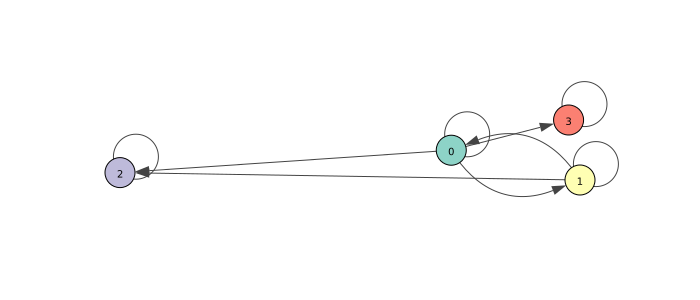

In [57]:
from util import util
import igraph as ig
g = util.build_website_graph(nnodes=4, rate=3, extra_arc_fraction=0.25, seed=42)
root = g.vs[0]

#util.display_graph(g)
ig.plot(g, **util.get_visual_style(g), bbox=(700, 300), margin=120)

In [58]:
util.route_random_flow(root, min_units=1, max_units=10, eoh=10, max_len=7)

(7.497988950401423, [(4, 0), (5, 1)])

In [59]:
eoh = 4
paths = util.build_random_paths(g, min_paths=3, max_paths=5,
                                                           min_units=1, max_units=10, eoh=eoh,
                                                           seed=3)
paths

[(7.373330403562943, [(0, 0), (1, 0), (2, 0), (3, 0)]),
 (9.036522589128893, [(1, 0), (2, 2), (3, 2)]),
 (2.130267794174526, [(3, 0)]),
 (3.23099467503432, [(2, 0), (3, 2)]),
 (7.253412874556227, [(0, 0), (1, 1), (2, 2), (3, 2)])]

In [60]:
node_counts, arc_counts = util.get_dynamic_counts(g, eoh, paths)
node_counts

{(0, 0): 14.626743278119172,
 (0, 1): 0,
 (0, 2): 0,
 (0, 3): 0,
 (1, 0): 16.409852992691835,
 (1, 1): 7.253412874556227,
 (1, 2): 0,
 (1, 3): 0,
 (2, 0): 10.604325078597263,
 (2, 1): 0,
 (2, 2): 16.28993546368512,
 (2, 3): 0,
 (3, 0): 9.50359819773747,
 (3, 1): 0,
 (3, 2): 19.520930138719443,
 (3, 3): 0}

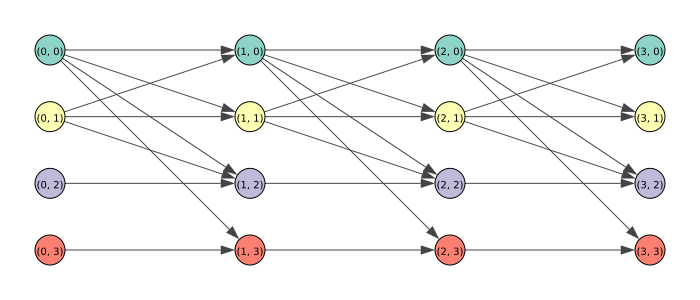

In [61]:
tug = util.build_time_unfolded_graph(g, eoh=eoh)

#util.display_graph(tug)
ig.plot(tug, **util.get_visual_style(tug), bbox=(700, 300), margin=50)

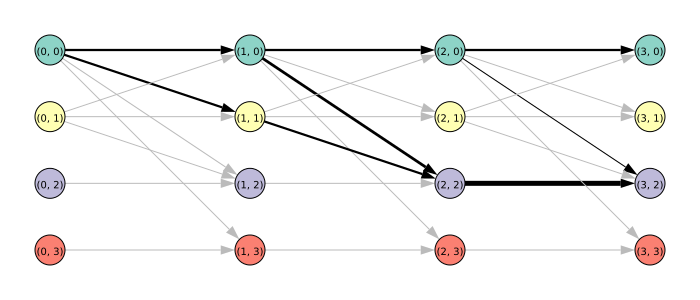

In [62]:
tugc = util.apply_weights(tug, node_counts, arc_counts)
ig.plot(tugc, **util.get_visual_style(tugc), bbox=(700, 300), margin=50)

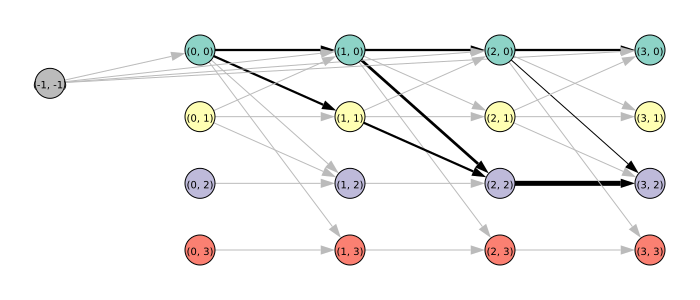

In [63]:
tugcs, tugcs_source = util._add_source_to_tug(tugc)
ig.plot(tugcs, **util.get_visual_style(tugcs), bbox=(700, 300), margin=50)

In [64]:
tug_paths = util.find_all_paths(tugcs, tugcs_source, exclude_source=True)

for i, p in enumerate(tug_paths):
    print(f'{i}: {p}')

0: [0, 4, 8, 12]
1: [0, 4, 8, 13]
2: [0, 4, 8, 14]
3: [0, 4, 8, 15]
4: [0, 4, 9, 12]
5: [0, 4, 9, 13]
6: [0, 4, 9, 14]
7: [0, 4, 10, 14]
8: [0, 4, 11, 15]
9: [0, 5, 8, 12]
10: [0, 5, 8, 13]
11: [0, 5, 8, 14]
12: [0, 5, 8, 15]
13: [0, 5, 9, 12]
14: [0, 5, 9, 13]
15: [0, 5, 9, 14]
16: [0, 5, 10, 14]
17: [0, 6, 10, 14]
18: [0, 7, 11, 15]
19: [4, 8, 12]
20: [4, 8, 13]
21: [4, 8, 14]
22: [4, 8, 15]
23: [4, 9, 12]
24: [4, 9, 13]
25: [4, 9, 14]
26: [4, 10, 14]
27: [4, 11, 15]
28: [8, 12]
29: [8, 13]
30: [8, 14]
31: [8, 15]
32: [12]


In [65]:
tmp = util.tug_paths_to_original(tugcs, tug_paths)
for i, p in enumerate(tmp):
    print(f'{i}: {p}')

0: [(0, 0), (1, 0), (2, 0), (3, 0)]
1: [(0, 0), (1, 0), (2, 0), (3, 1)]
2: [(0, 0), (1, 0), (2, 0), (3, 2)]
3: [(0, 0), (1, 0), (2, 0), (3, 3)]
4: [(0, 0), (1, 0), (2, 1), (3, 0)]
5: [(0, 0), (1, 0), (2, 1), (3, 1)]
6: [(0, 0), (1, 0), (2, 1), (3, 2)]
7: [(0, 0), (1, 0), (2, 2), (3, 2)]
8: [(0, 0), (1, 0), (2, 3), (3, 3)]
9: [(0, 0), (1, 1), (2, 0), (3, 0)]
10: [(0, 0), (1, 1), (2, 0), (3, 1)]
11: [(0, 0), (1, 1), (2, 0), (3, 2)]
12: [(0, 0), (1, 1), (2, 0), (3, 3)]
13: [(0, 0), (1, 1), (2, 1), (3, 0)]
14: [(0, 0), (1, 1), (2, 1), (3, 1)]
15: [(0, 0), (1, 1), (2, 1), (3, 2)]
16: [(0, 0), (1, 1), (2, 2), (3, 2)]
17: [(0, 0), (1, 2), (2, 2), (3, 2)]
18: [(0, 0), (1, 3), (2, 3), (3, 3)]
19: [(1, 0), (2, 0), (3, 0)]
20: [(1, 0), (2, 0), (3, 1)]
21: [(1, 0), (2, 0), (3, 2)]
22: [(1, 0), (2, 0), (3, 3)]
23: [(1, 0), (2, 1), (3, 0)]
24: [(1, 0), (2, 1), (3, 1)]
25: [(1, 0), (2, 1), (3, 2)]
26: [(1, 0), (2, 2), (3, 2)]
27: [(1, 0), (2, 3), (3, 3)]
28: [(2, 0), (3, 0)]
29: [(2, 0), (3, 1)]
30: 

In [66]:
paths

[(7.373330403562943, [(0, 0), (1, 0), (2, 0), (3, 0)]),
 (9.036522589128893, [(1, 0), (2, 2), (3, 2)]),
 (2.130267794174526, [(3, 0)]),
 (3.23099467503432, [(2, 0), (3, 2)]),
 (7.253412874556227, [(0, 0), (1, 1), (2, 2), (3, 2)])]

In [67]:
#pidx = [0, 26, 32, 30, 16]
#tug_paths = [tug_paths[i] for i in pidx]
#tug_paths

$$
\arg \min_{x} \left\{\|Vx - \hat{v}\|_2^2 + \|Ex - \hat{e}\|_2^2 \mid x \geq 0 \right\}
$$

$$\begin{align}
\|Ax - b\|_2^2 &= (Ax - b)^T (Ax - b) \\
&= x^T A^TA x - x^T A^T b - b^T Ax + b^T b \\
&\propto \frac{1}{2} x^T (A^TA) x - \frac{1}{2} x^T A^T b - \frac{1}{2} b^T Ax \\
&= \frac{1}{2} x^T (A^TA) x + (-A^Tb)^Tx
\end{align}$$

Since $y^Tx = x^Ty$ if the result is a scalar

$$
\|Vx - \hat{v}\|_2^2 + \|Ex - \hat{e}\|_2^2 \\
\propto \frac{1}{2} \|Vx - \hat{v}\|_2^2 + \frac{1}{2} \|Ex - \hat{e}\|_2^2 \\
= \frac{1}{2}x^T (V^T V) x + (-V^T \hat{v})^T x + \frac{1}{2} x^T (E^T E) x + (-E^T \hat{e})^T x \\
= \frac{1}{2} x^T P x + q^T x
$$
where:
$$
P = V^T V + E^T E \\
q = -V^T \hat{v} -E^T \hat{e}
$$
and $P$ is guaranteed to be positive semi-definite

In [68]:
V, E = util._paths_to_coefficient_matrices(tug, tug_paths)
v, e = util._counts_to_target_vectors(tug, node_counts, arc_counts)

In [69]:
node_counts

{(0, 0): 14.626743278119172,
 (0, 1): 0,
 (0, 2): 0,
 (0, 3): 0,
 (1, 0): 16.409852992691835,
 (1, 1): 7.253412874556227,
 (1, 2): 0,
 (1, 3): 0,
 (2, 0): 10.604325078597263,
 (2, 1): 0,
 (2, 2): 16.28993546368512,
 (2, 3): 0,
 (3, 0): 9.50359819773747,
 (3, 1): 0,
 (3, 2): 19.520930138719443,
 (3, 3): 0}

In [70]:
v.reshape((-1,1))

array([[14.62674328],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [16.40985299],
       [ 7.25341287],
       [ 0.        ],
       [ 0.        ],
       [10.60432508],
       [ 0.        ],
       [16.28993546],
       [ 0.        ],
       [ 9.5035982 ],
       [ 0.        ],
       [19.52093014],
       [ 0.        ]])

In [71]:
arc_counts

{(1, 0, 0): 7.373330403562943,
 (1, 0, 1): 7.253412874556227,
 (1, 1, 1): 0,
 (1, 0, 2): 0,
 (1, 2, 2): 0,
 (1, 0, 3): 0,
 (1, 3, 3): 0,
 (1, 1, 0): 0,
 (1, 1, 2): 0,
 (2, 0, 0): 7.373330403562943,
 (2, 0, 1): 0,
 (2, 1, 1): 0,
 (2, 0, 2): 9.036522589128893,
 (2, 2, 2): 0,
 (2, 0, 3): 0,
 (2, 3, 3): 0,
 (2, 1, 0): 0,
 (2, 1, 2): 7.253412874556227,
 (3, 0, 0): 7.373330403562943,
 (3, 0, 1): 0,
 (3, 1, 1): 0,
 (3, 0, 2): 3.23099467503432,
 (3, 2, 2): 16.28993546368512,
 (3, 0, 3): 0,
 (3, 3, 3): 0,
 (3, 1, 0): 0,
 (3, 1, 2): 0}

In [72]:
e.reshape((-1,1))

array([[ 7.3733304 ],
       [ 7.25341287],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 7.3733304 ],
       [ 0.        ],
       [ 0.        ],
       [ 9.03652259],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 7.25341287],
       [ 7.3733304 ],
       [ 0.        ],
       [ 0.        ],
       [ 3.23099468],
       [16.28993546],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ]])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
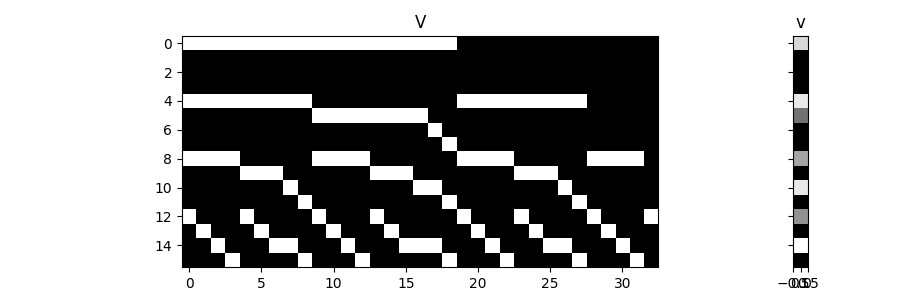

In [73]:
plt.close('all')
util.plot_matrix(V.toarray(), v, figsize=figsize, title='V', title_b='v')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
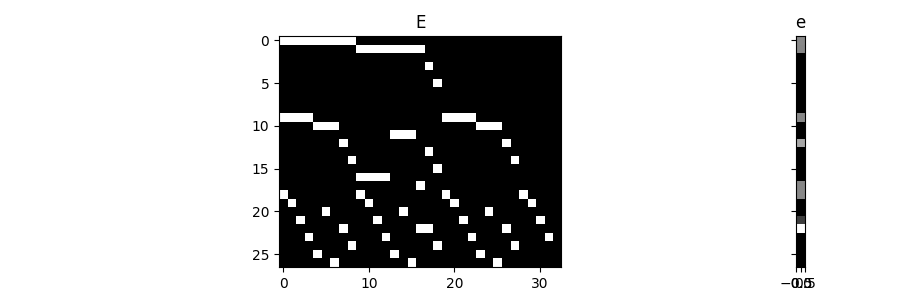

In [74]:
plt.close('all')
util.plot_matrix(E.toarray(), e, figsize=figsize, title='E', title_b='e')

In [75]:
prb = util.PathSelectionSolver(tug, node_counts, arc_counts)
prb.setup(tug_paths, alpha=0, polish=True)
sol = prb.solve()
reconstructed_paths = prb.sol_to_paths()
reconstructed_paths

-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 33, constraints m = 33
          nnz(P) + nnz(A) = 473
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -9.0728e+02   1.35e-01   2.17e+01   1.00e-01   1.52e-04s
  50  -1.0054e+03   9.27e-05   1.51e-02   1.00e-01   5.76e-04s
plsh  -1.0054e+03   1.04e-16   2.03e-14   ------

[(2.1991155307335504, [(0, 0), (1, 0), (2, 0), (3, 0)]),
 (1.0828060068299024, [(0, 0), (1, 0), (2, 0), (3, 2)]),
 (4.091408865999492, [(0, 0), (1, 0), (2, 2), (3, 2)]),
 (7.253412874556228, [(0, 0), (1, 1), (2, 2), (3, 2)]),
 (2.706122053399817, [(1, 0), (2, 0), (3, 0)]),
 (1.385286812599684, [(1, 0), (2, 0), (3, 2)]),
 (4.945113723129393, [(1, 0), (2, 2), (3, 2)]),
 (2.468092819429568, [(2, 0), (3, 0)]),
 (0.7629018556047334, [(2, 0), (3, 2)]),
 (2.130267794174534, [(3, 0)])]

In [76]:
paths

[(7.373330403562943, [(0, 0), (1, 0), (2, 0), (3, 0)]),
 (9.036522589128893, [(1, 0), (2, 2), (3, 2)]),
 (2.130267794174526, [(3, 0)]),
 (3.23099467503432, [(2, 0), (3, 2)]),
 (7.253412874556227, [(0, 0), (1, 1), (2, 2), (3, 2)])]

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
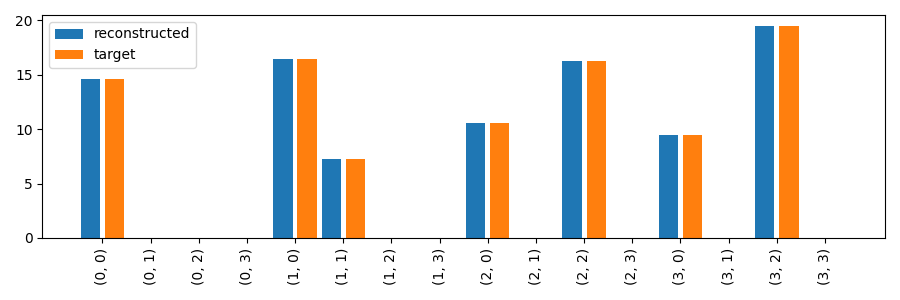

In [77]:
rec_node_counts, rec_arc_counts = util.get_dynamic_counts(g, eoh, reconstructed_paths)
util.plot_dict(rec_node_counts, figsize=figsize, label='reconstructed', data2=node_counts, label2='target',
              title='Node Counts')

In [78]:
reconstructed_paths

[(2.1991155307335504, [(0, 0), (1, 0), (2, 0), (3, 0)]),
 (1.0828060068299024, [(0, 0), (1, 0), (2, 0), (3, 2)]),
 (4.091408865999492, [(0, 0), (1, 0), (2, 2), (3, 2)]),
 (7.253412874556228, [(0, 0), (1, 1), (2, 2), (3, 2)]),
 (2.706122053399817, [(1, 0), (2, 0), (3, 0)]),
 (1.385286812599684, [(1, 0), (2, 0), (3, 2)]),
 (4.945113723129393, [(1, 0), (2, 2), (3, 2)]),
 (2.468092819429568, [(2, 0), (3, 0)]),
 (0.7629018556047334, [(2, 0), (3, 2)]),
 (2.130267794174534, [(3, 0)])]

In [79]:
_, consolidated_paths = util.consolidate_paths(reconstructed_paths, node_counts, arc_counts)

In [80]:
sorted(consolidated_paths, key=lambda p: -len(p[1]))

[(7.373330403562943, [(0, 0), (1, 0), (2, 0), (3, 0)]),
 (7.2534128745562265, [(0, 0), (1, 1), (2, 2), (3, 2)]),
 (9.036522589128893, [(1, 0), (2, 2), (3, 2)]),
 (3.2309946750343204, [(2, 0), (3, 2)]),
 (2.1302677941745256, [(3, 0)])]

In [81]:
sorted(paths, key=lambda p: -len(p[1]))

[(7.373330403562943, [(0, 0), (1, 0), (2, 0), (3, 0)]),
 (7.253412874556227, [(0, 0), (1, 1), (2, 2), (3, 2)]),
 (9.036522589128893, [(1, 0), (2, 2), (3, 2)]),
 (3.23099467503432, [(2, 0), (3, 2)]),
 (2.130267794174526, [(3, 0)])]

In [82]:
node_res, arc_res = util.get_estimation_residuals(g, eoh, consolidated_paths, node_counts, arc_counts)
node_res

{(0, 0): -1.7763568394002505e-15,
 (0, 1): 0,
 (0, 2): 0,
 (0, 3): 0,
 (1, 0): 0.0,
 (1, 1): -8.881784197001252e-16,
 (1, 2): 0,
 (1, 3): 0,
 (2, 0): 0.0,
 (2, 1): 0,
 (2, 2): 0.0,
 (2, 3): 0,
 (3, 0): 0.0,
 (3, 1): 0,
 (3, 2): -3.552713678800501e-15,
 (3, 3): 0}

In [83]:
# Obtain dual multipliers assuming a standard form
#master.get_standard_duals()

$$
\mathcal{L}(x, \lambda) = \frac{1}{2} x^T P x + q^T x + \lambda^T (-x) \\
\nabla_x \mathcal{L}(x, \lambda) = \frac{1}{2} x^T(P + P^T) + q - \lambda^T
$$

$$
\frac{1}{2} \|Vx - \hat{v}\|_2^2 = \frac{1}{2} \sum_{i = 1}^m \left(\sum_{j=1}^n V_{ij} x_{j} - \hat{v}_i\right)^2
$$
$$
\frac{\partial}{\partial x_j} \frac{1}{2} \|Vx - \hat{v}\|_2^2 = \sum_{i=1}^m \left(\sum_{j=1}^n V_{ij} x_{j} - \hat{v}_i\right) V_{ij}
$$


In [84]:
path_pool_seq = []
raw_paths_seq = []
node_res_seq = []
arc_res_seq = []

path_pool_seq.append(tug_paths[1:3])

k = 0
master = util.PathSelectionSolver(tug, node_counts, arc_counts)
master.setup(path_pool_seq[k], alpha=0, polish=True)
sol = master.solve()
raw_paths_seq.append(master.sol_to_paths())
raw_paths_seq[k]

-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 2, constraints m = 2
          nnz(P) + nnz(A) = 5
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -3.8760e+02   0.00e+00   2.44e+01   1.00e-01   1.79e-04s
  25  -4.4736e+02   1.33e-04   1.02e-03   1.00e-01   3.34e-04s
plsh  -4.4736e+02   2.72e-21   1.03e-15   --------  

[(11.305643852898275, [(0, 0), (1, 0), (2, 0), (3, 2)])]

In [89]:
nres, ares = util.get_estimation_residuals(g, eoh, raw_paths_seq[k], node_counts, arc_counts)
print(nres)
print(ares)

tugs, tugs_source = util._add_source_to_tug(tug)

import numpy as np
weights_map = {k: v + nres[k[0], k[2]] for k, v in ares.items()}
weights_map.update({(t, -1, 0): nres[t, 0] for t in range(eoh)})
weights = np.array([weights_map[w['time'], w['source_o'], w['target_o']] for w in tugs.es])
weights = weights - weights.min()

to = [v for v in tugs.vs if v != tugs_source]

tugs.get_all_shortest_paths(tugs_source, to=to, weights=weights)

{(0, 0): -3.321099425220897, (0, 1): 0, (0, 2): 0, (0, 3): 0, (1, 0): -5.104209139793561, (1, 1): -7.253412874556227, (1, 2): 0, (1, 3): 0, (2, 0): 0.7013187743010114, (2, 1): 0, (2, 2): -16.28993546368512, (2, 3): 0, (3, 0): -9.50359819773747, (3, 1): 0, (3, 2): -8.215286285821168, (3, 3): 0}
{(1, 0, 0): 3.9323134493353313, (1, 0, 1): -7.253412874556227, (1, 1, 1): 0, (1, 0, 2): 0, (1, 2, 2): 0, (1, 0, 3): 0, (1, 3, 3): 0, (1, 1, 0): 0, (1, 1, 2): 0, (2, 0, 0): 3.9323134493353313, (2, 0, 1): 0, (2, 1, 1): 0, (2, 0, 2): -9.036522589128893, (2, 2, 2): 0, (2, 0, 3): 0, (2, 3, 3): 0, (2, 1, 0): 0, (2, 1, 2): -7.253412874556227, (3, 0, 0): -7.373330403562943, (3, 0, 1): 0, (3, 1, 1): 0, (3, 0, 2): 8.074649177863954, (3, 2, 2): -16.28993546368512, (3, 0, 3): 0, (3, 3, 3): 0, (3, 1, 0): 0, (3, 1, 2): 0}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: Couldn't reach some vertices at src/paths/dijkstra.c:837
  from ipykernel import kernelapp as app


[[16, 0],
 [16, 4],
 [16, 0, 5],
 [16, 0, 6],
 [16, 0, 7],
 [16, 8],
 [16, 4, 9],
 [16, 4, 10],
 [16, 4, 11],
 [16, 12],
 [16, 8, 13],
 [16, 4, 10, 14],
 [16, 8, 15]]